1. Importing libraries

In [ ]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

2. Data Loading and Initial Exploration

In [ ]:
# Load dataset, skipping bad lines
data = pd.read_csv('vehicles.csv', on_bad_lines='skip', engine='python')

print("\nFirst 5 rows:")
display(data.head())

# Show dataset info (columns, types, non-null counts)
print(data.info())

print("\nDescriptive statistics:")
display(data.describe)


First 5 rows:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5999 non-null   int64  
 1   url           5999 non-null   object 
 2   region        5999 non-null   object 
 3   region_url    5999 non-null   object 
 4   price         5999 non-null   int64  
 5   year          5913 non-null   float64
 6   manufacturer  5650 non-null   object 
 7   model         5914 non-null   object 
 8   condition     3470 non-null   object 
 9   cylinders     3874 non-null   object 
 10  fuel          5890 non-null   object 
 11  odometer      5952 non-null   float64
 12  title_status  5819 non-null   object 
 13  transmission  5961 non-null   object 
 14  VIN           3884 non-null   object 
 15  drive         4090 non-null   object 
 16  size          1729 non-null   object 
 17  type          4652 non-null   object 
 18  paint_color   4778 non-null 

<bound method NDFrame.describe of               id                                                url  \
0     7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1     7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2     7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3     7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4     7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...          ...                                                ...   
5994  7312193910  https://anchorage.craigslist.org/cto/d/wasilla...   
5995  7312190210  https://anchorage.craigslist.org/ctd/d/anchora...   
5996  7312185248  https://anchorage.craigslist.org/cto/d/houston...   
5997  7312184647  https://anchorage.craigslist.org/cto/d/anchora...   
5998  7312181548  https://anchorage.craigslist.org/ctd/d/anchora...   

                      region                         region_url  price  \
0                   prescott    https://prescott.craigslist.org   6000   
1               fayetteville       https://fayar.craigslist.org  11900   
2               florida keys        https://keys.craigslist.org  21000   
3     worcester / central MA   https://worcester.craigslist.org   1500   
4                 greensboro  https://greensboro.craigslist.org   4900   
...                      ...                                ...    ...   
5994      anchorage / mat-su   https://anchorage.craigslist.org   4300   
5995      anchorage / mat-su   https://anchorage.craigslist.org  33999   
5996      anchorage / mat-su   https://anchorage.craigslist.org   3500   
5997      anchorage / mat-su   https://anchorage.craigslist.org  20995   
5998      anchorage / mat-su   https://anchorage.craigslist.org  26499   

        year manufacturer                      model condition    cylinders  \
0        NaN          NaN                        NaN       NaN          NaN   
1        NaN          NaN                        NaN       NaN          NaN   
2        NaN          NaN                        NaN       NaN          NaN   
3        NaN          NaN                        NaN       NaN          NaN   
4        NaN          NaN                        NaN       NaN          NaN   
...      ...          ...                        ...       ...          ...   
5994  2001.0          ram                 1500 sport      good          NaN   
5995  2018.0          bmw               x2 xdrive28i       NaN  4 cylinders   
5996  2001.0         ford                     ranger       NaN          NaN   
5997  2013.0       toyota  highlander hybrid limited       NaN          NaN   
5998  2019.0    chevrolet                    equinox       NaN  4 cylinders   

      ... size  type paint_color  \
0     ...  NaN   NaN         NaN   
1     ...  NaN   NaN         NaN   
2     ...  NaN   NaN         NaN   
3     ...  NaN   NaN         NaN   
4     ...  NaN   NaN         NaN   
...   ...  ...   ...         ...   
5994  ...  NaN   NaN         NaN   
5995  ...  NaN   SUV        blue   
5996  ...  NaN   NaN         NaN   
5997  ...  NaN   SUV       white   
5998  ...  NaN   SUV        grey   

                                              image_url  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
5994  https://images.craigslist.org/00E0E_eoGCskEK1g...   
5995  https://images.craigslist.org/00h0h_6SyqEdPGp2...   
5996  https://images.craigslist.org/00101_1DQPUl2c8F...   
5997  https://images.craigslist.org/00606_7vL8Dni3tJ...   
5998  https://images.craigslist.org/00D0D_464c1C4vqt...   

                                            description county state  \
0                                                   NaN    Na

3. Data Cleaning and Preparation

In [ ]:
data = data[(data['price'] > 500) & (data['price'] < 100000)]
data['odometer'] = data['odometer'] / 1000

# Converting posting_date to datetime, handling timezone-aware values
data['posting_date'] = pd.to_datetime(data['posting_date'], utc=True)
data['posting_year'] = data['posting_date'].dt.year

# Creating age feature
current_year = pd.Timestamp.now().year
data['age'] = current_year - data['year']

# Dropping unnecessary columns and rows with missing target values
data = data.dropna(subset=['price'])
cols_to_drop = ['id', 'url', 'region_url', 'image_url', 'description', 'posting_date', 'county']
data = data.drop(columns=cols_to_drop, errors='ignore')

print("\nData shape after cleaning:", data.shape)


Data shape after cleaning: (5670, 21)


4. Exploratory Data Analysis and Visualization

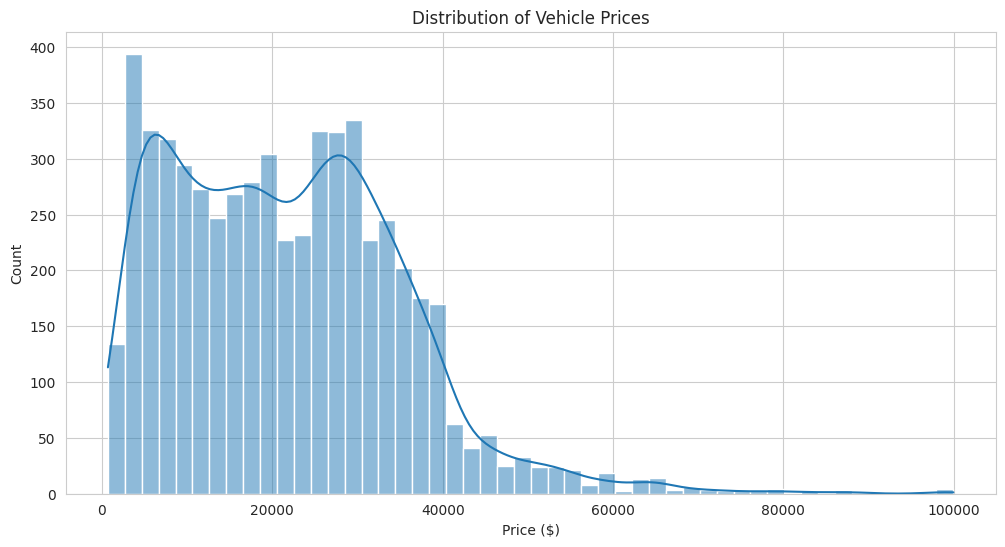

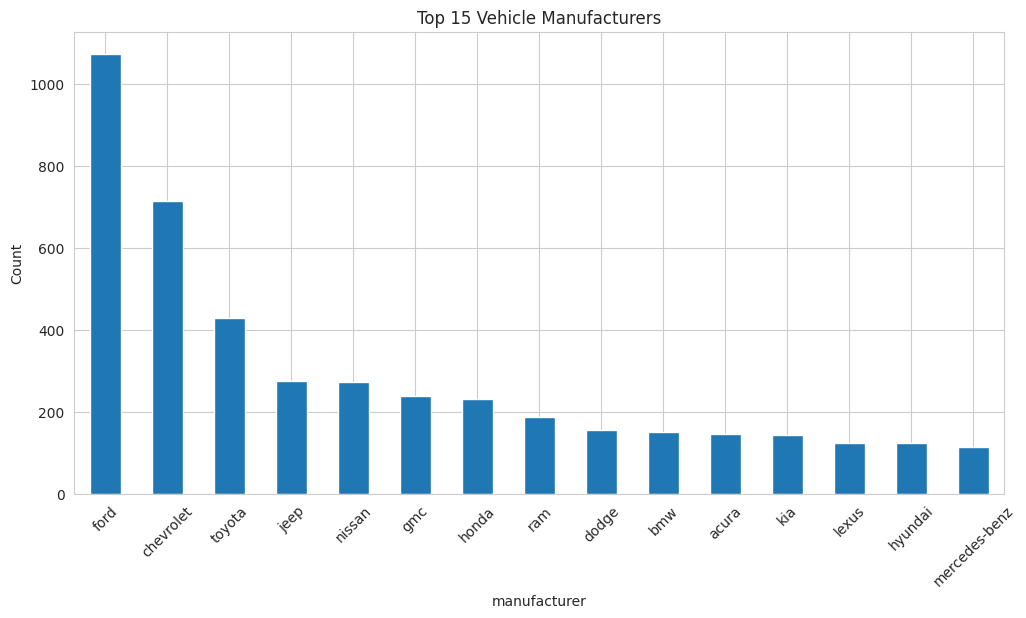

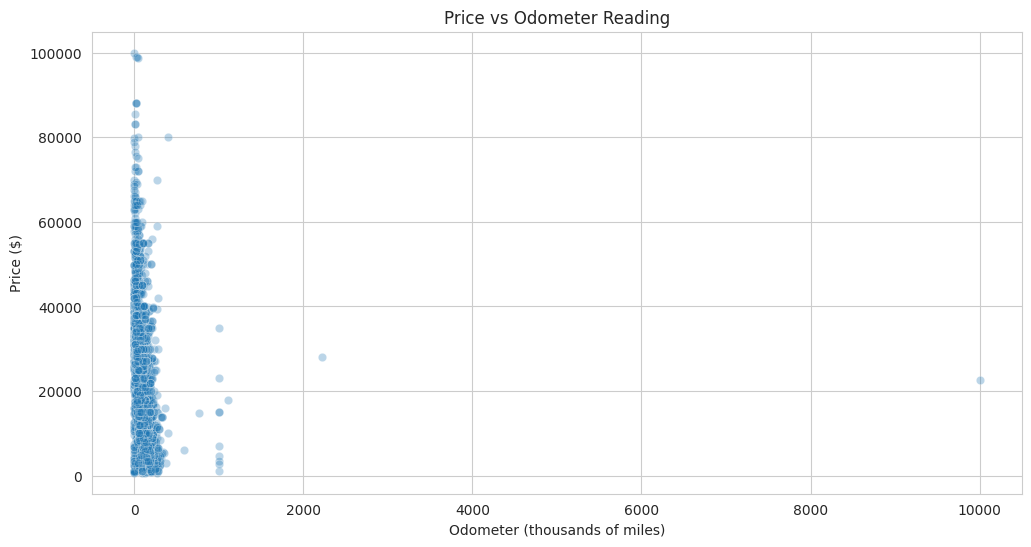

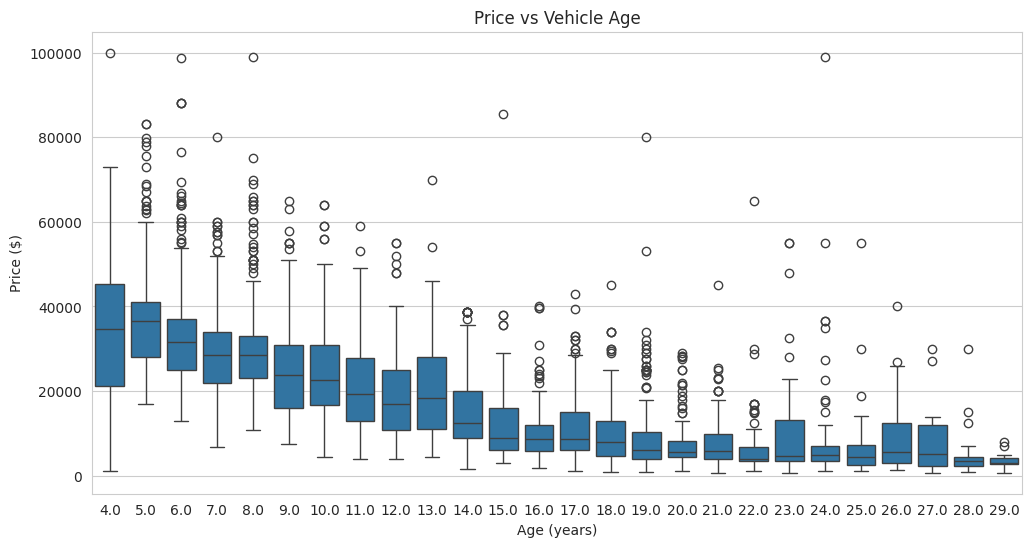

In [ ]:
# Plot distribution of vehicle prices
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.show()

# Bar chart of top 15 vehicle manufacturers by count
plt.figure(figsize=(12, 6))
data['manufacturer'].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Vehicle Manufacturers')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Scatter plot: price vs odometer reading
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', data=data, alpha=0.3)
plt.title('Price vs Odometer Reading')
plt.xlabel('Odometer (thousands of miles)')
plt.ylabel('Price ($)')
plt.show()

# Boxplot: price vs vehicle age (for vehicles less than 30 years old)
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='price', data=data[data['age'] < 30])
plt.title('Price vs Vehicle Age')
plt.xlabel('Age (years)')
plt.ylabel('Price ($)')
plt.show()

5. Data Preprocessing

In [ ]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Identifying numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Pipeline for numerical features
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Pipeline for categorical features
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (4536, 20)
Test set shape: (1134, 20)


6. Model Building and Training


6.1 Simple Linear Regression (Single Feature - odometer)

Missing values in training odometer: 31
Missing values in test odometer: 7

Simple Linear Regression (Price ~ Odometer) Results:
Train R²: 0.056
Test R²: 0.100
Coefficient: -18.877 (price decreases by $18.88 per 1000 miles)
Intercept: $23,253.25 (estimated price when odometer is 0)


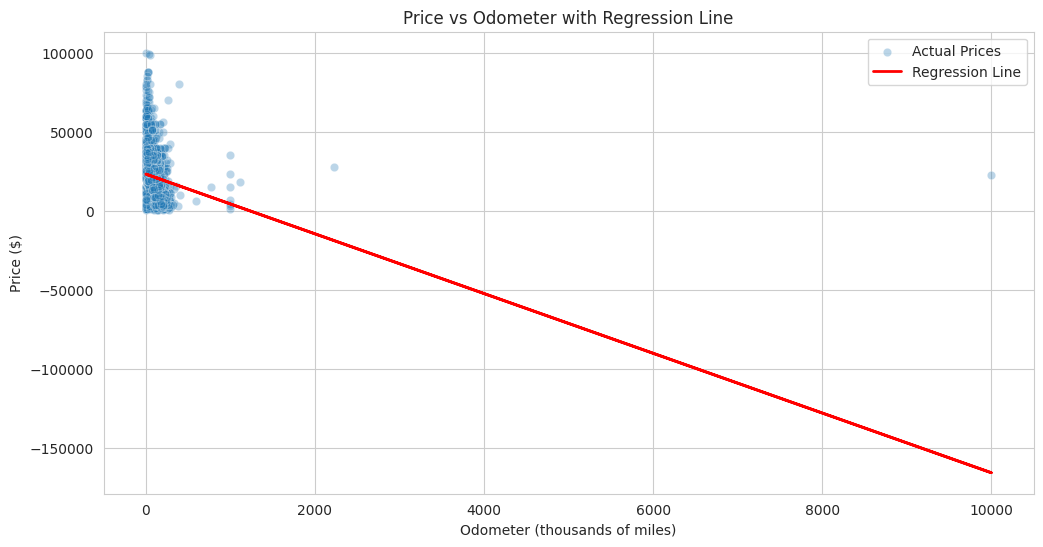

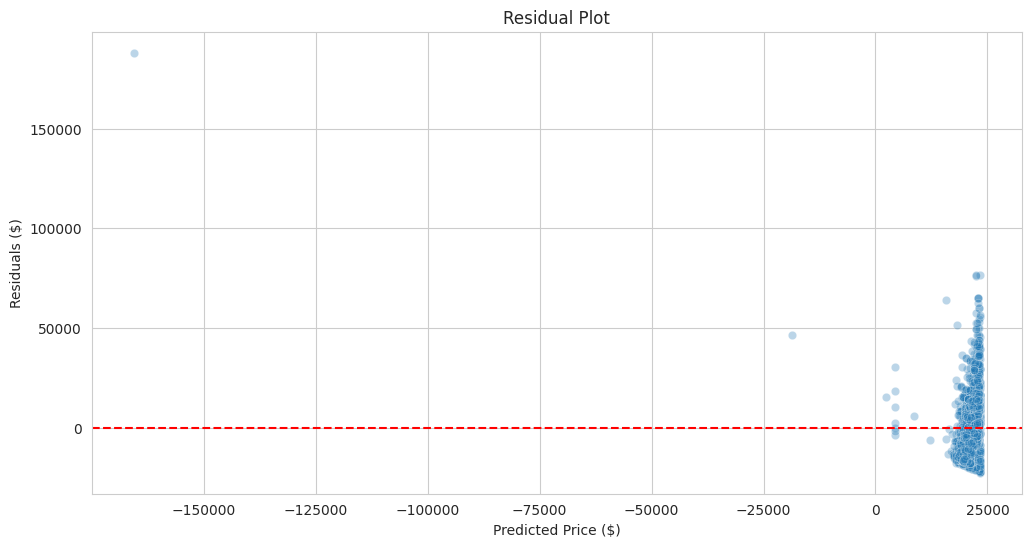

In [ ]:
# Creating odometer only datasets
X_train_odo = X_train[['odometer']]
X_test_odo = X_test[['odometer']]

# Check for missing values in odometer feature
print("Missing values in training odometer:", X_train_odo['odometer'].isna().sum())
print("Missing values in test odometer:", X_test_odo['odometer'].isna().sum())

# Drop missing values to ensure clean training/testing data
X_train_odo_clean = X_train_odo.dropna()
y_train_clean = y_train.loc[X_train_odo_clean.index]

X_test_odo_clean = X_test_odo.dropna()
y_test_clean = y_test.loc[X_test_odo_clean.index]

# Training the simple linear regression
simple_lr = LinearRegression()
simple_lr.fit(X_train_odo_clean, y_train_clean)

# Predict prices on training and test sets
train_pred = simple_lr.predict(X_train_odo_clean)
test_pred = simple_lr.predict(X_test_odo_clean)

# Display model performance and coefficients
print("\nSimple Linear Regression (Price ~ Odometer) Results:")
print(f"Train R²: {r2_score(y_train_clean, train_pred):.3f}")
print(f"Test R²: {r2_score(y_test_clean, test_pred):.3f}")
print(f"Coefficient: {simple_lr.coef_[0]:.3f} (price decreases by ${abs(simple_lr.coef_[0]):.2f} per 1000 miles)")
print(f"Intercept: ${simple_lr.intercept_:,.2f} (estimated price when odometer is 0)")

# Plot actual prices vs odometer with regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_train_odo_clean['odometer'], y=y_train_clean, alpha=0.3, label='Actual Prices')
plt.plot(X_train_odo_clean, train_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Price vs Odometer with Regression Line')
plt.xlabel('Odometer (thousands of miles)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

# Plotting residuals
residuals = y_train_clean - train_pred
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_pred, y=residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.show()

6.2 Multiple Linear Regression

Multiple Linear Regression Results:

Training Set Metrics:
MAE: $1,079.79
RMSE: $3,168.02
R²: 0.945

Test Set Metrics:
MAE: $5,449.98
RMSE: $9,751.55
R²: 0.466


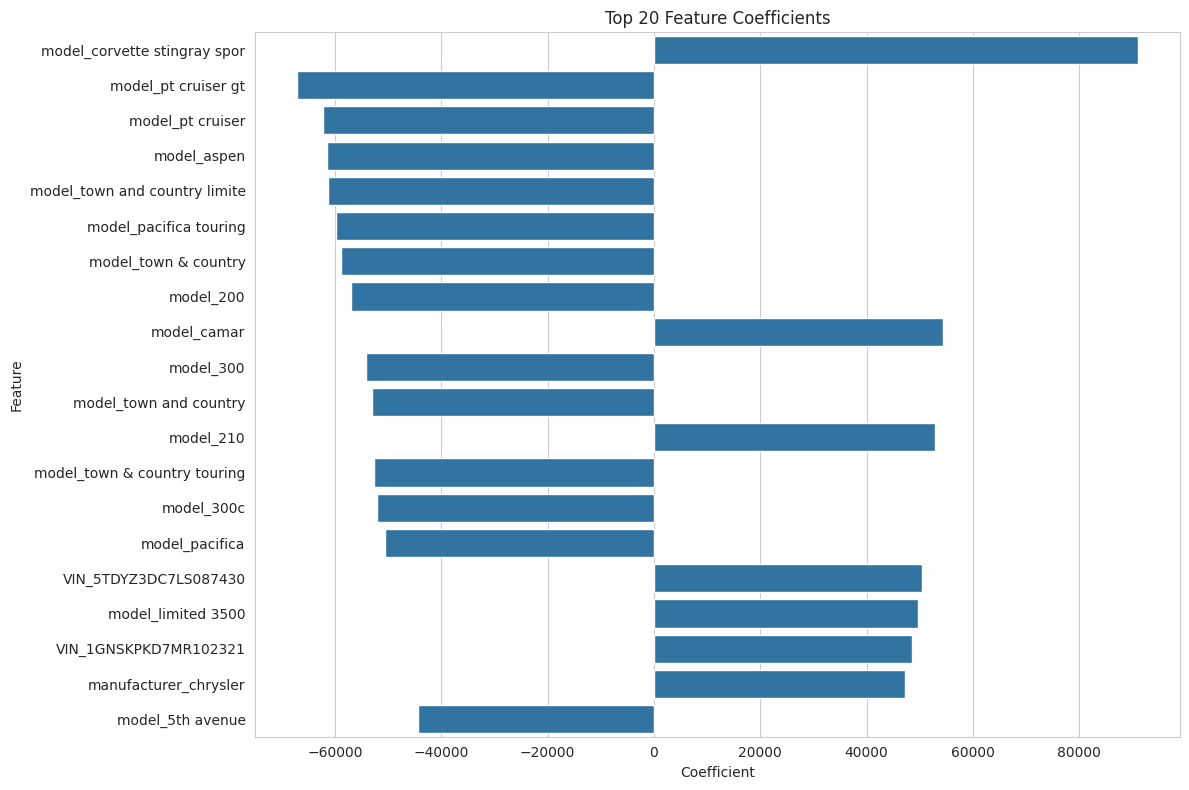

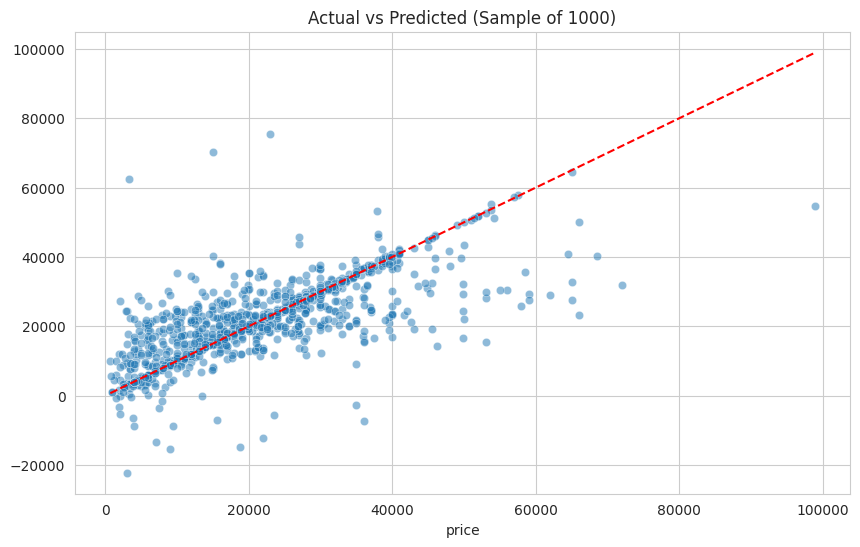

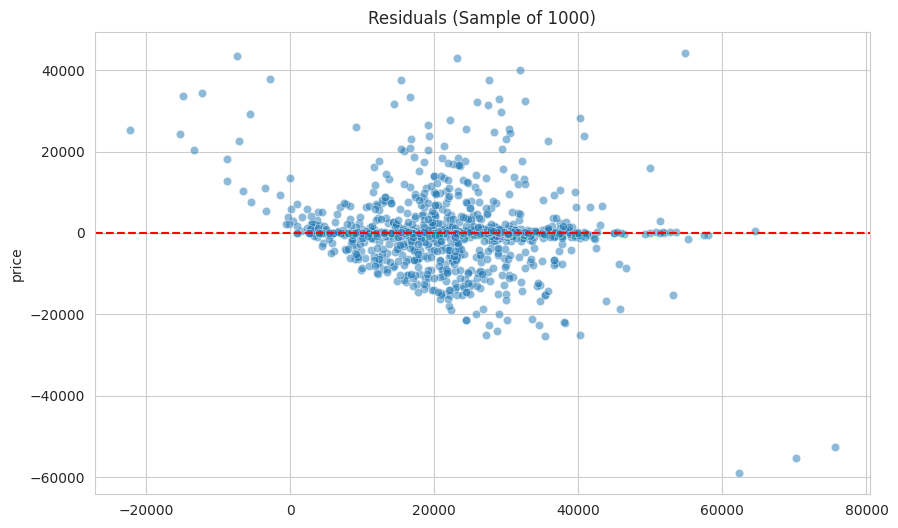

In [ ]:
# Converting categorical columns to category dtype
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(handle_unknown='ignore', sparse_output=True)
        ), categorical_features)
    ])

try:
    # Creating pipeline
    linear_pipeline = make_pipeline(
        preprocessor,
        LinearRegression()
    )

    linear_pipeline.fit(X_train, y_train)

    def predict_in_batches(model, X, batch_size=1000):
        predictions = []
        for i in range(0, len(X), batch_size):
            batch = X.iloc[i:i+batch_size]
            predictions.extend(model.predict(batch))
        return np.array(predictions)

    y_train_pred = predict_in_batches(linear_pipeline, X_train)
    y_test_pred = predict_in_batches(linear_pipeline, X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    # Printing evaluation metrics
    print("Multiple Linear Regression Results:")
    print("\nTraining Set Metrics:")
    print(f"MAE: ${train_mae:,.2f}")
    print(f"RMSE: ${train_rmse:,.2f}")
    print(f"R²: {train_r2:.3f}")

    print("\nTest Set Metrics:")
    print(f"MAE: ${test_mae:,.2f}")
    print(f"RMSE: ${test_rmse:,.2f}")
    print(f"R²: {test_r2:.3f}")

    try:
        numeric_features = list(numerical_features)
        ohe = linear_pipeline.named_steps['columntransformer'].named_transformers_['cat'].named_steps['onehotencoder']
        categorical_features_encoded = ohe.get_feature_names_out(categorical_features)
        all_features = numeric_features + list(categorical_features_encoded)

        coefficients = linear_pipeline.named_steps['linearregression'].coef_

        feature_importance = pd.DataFrame({
            'Feature': all_features,
            'Coefficient': coefficients
        }).sort_values('Coefficient', key=abs, ascending=False).head(20)

        # Plotting top 20 features
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title('Top 20 Feature Coefficients')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not create feature importance plot: {str(e)}")

    sample_size = min(1000, len(y_test))
    idx = np.random.choice(len(y_test), sample_size, replace=False)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test.iloc[idx], y=y_test_pred[idx], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted (Sample of {sample_size})')
    plt.show()

    residuals = y_test.iloc[idx] - y_test_pred[idx]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_pred[idx], y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals (Sample of {sample_size})')
    plt.show()

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("Try reducing the number of features or using a smaller dataset")

6.3 Random Forest

Training Random Forest model...
Training completed successfully!
Making predictions...

Random Forest Regression Results:

Training Set Metrics:
MAE: $2,973.65
RMSE: $4,873.48
R²: 0.871

Test Set Metrics:
MAE: $4,091.29
RMSE: $6,664.11
R²: 0.751


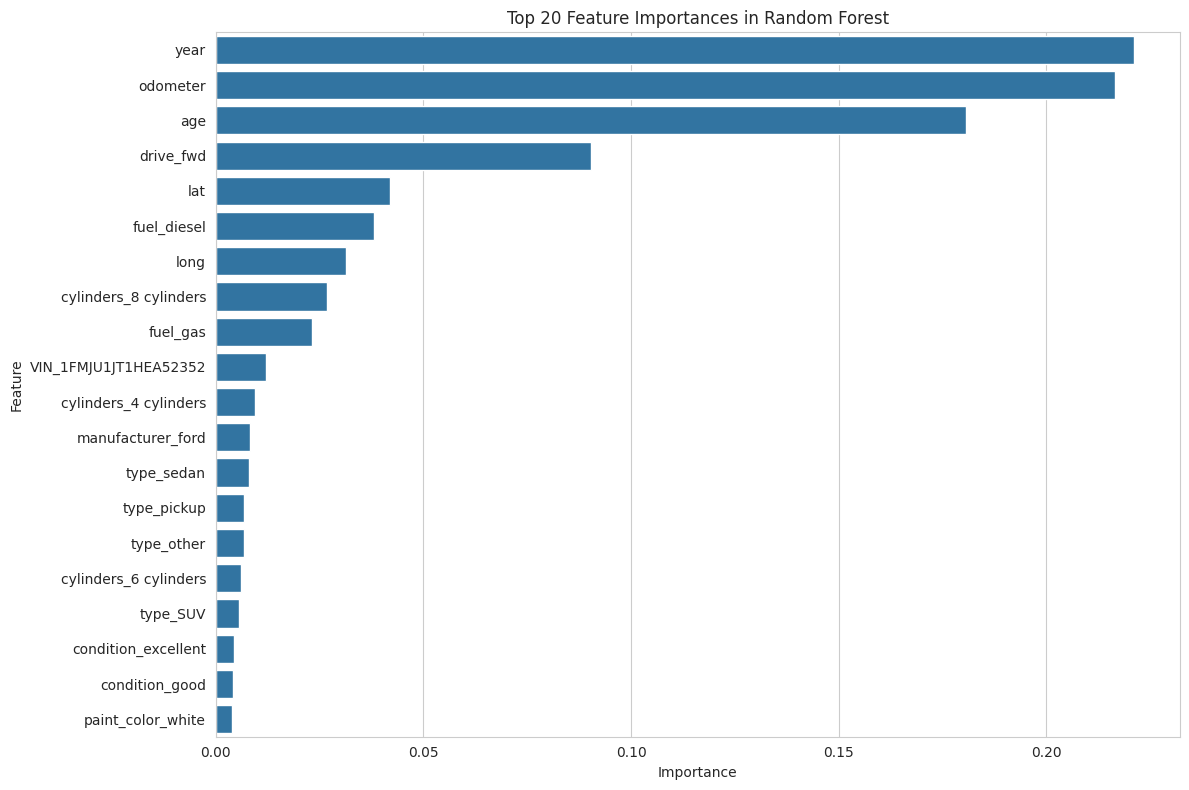

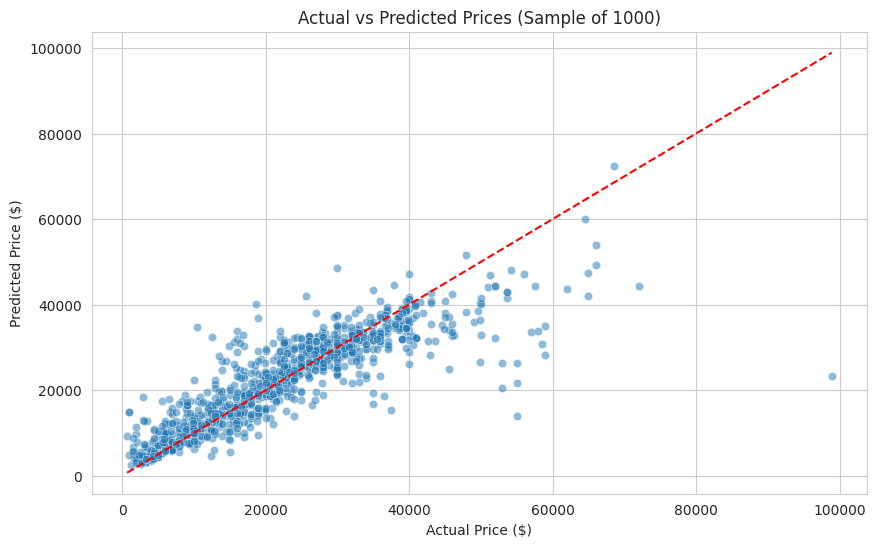

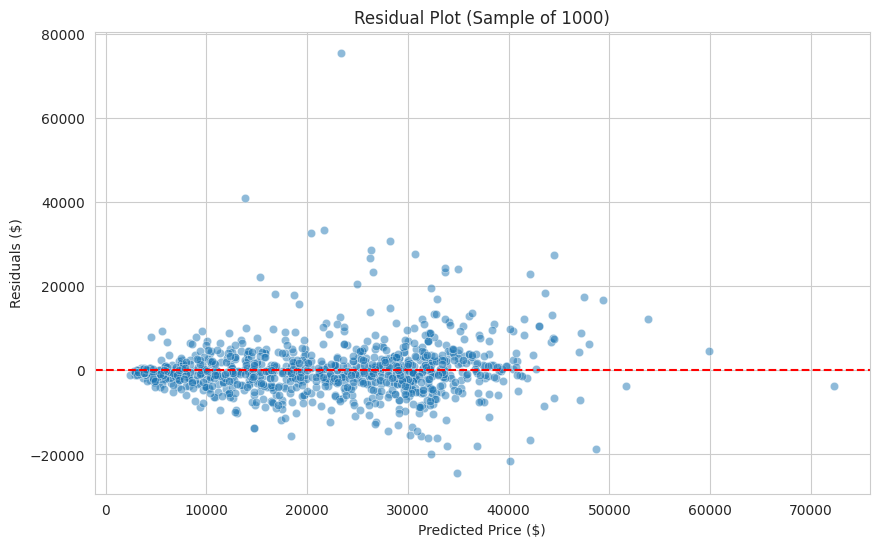


Performing cross-validation...
Cross-validated R² scores: [0.75789723 0.75151578 0.72913483]
Mean CV R²: 0.746 ± 0.012


In [ ]:
# Convert categorical columns to category type
for col in categorical_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

# Setup preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(handle_unknown='ignore', sparse_output=True)
        ), categorical_features)
    ])

# Build pipeline with preprocessing and Random Forest model
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        n_estimators=100,
        max_depth=15,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    )
)

try:
    print("Training Random Forest model...")
    rf_pipeline.fit(X_train, y_train)
    print("Training completed successfully!")

    def predict_in_batches(model, X, batch_size=1000):
        predictions = []
        for i in range(0, len(X), batch_size):
            batch = X.iloc[i:i+batch_size]
            predictions.extend(model.predict(batch))
        return np.array(predictions)

    print("Making predictions...")
    y_train_pred = predict_in_batches(rf_pipeline, X_train)
    y_test_pred = predict_in_batches(rf_pipeline, X_test)

    # Calculate metrics
    def calculate_metrics(y_true, y_pred):
        return {
            'MAE': mean_absolute_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'R2': r2_score(y_true, y_pred)
        }

    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Show metrics
    print("\nRandom Forest Regression Results:")
    print("\nTraining Set Metrics:")
    print(f"MAE: ${train_metrics['MAE']:,.2f}")
    print(f"RMSE: ${train_metrics['RMSE']:,.2f}")
    print(f"R²: {train_metrics['R2']:.3f}")
    print("\nTest Set Metrics:")
    print(f"MAE: ${test_metrics['MAE']:,.2f}")
    print(f"RMSE: ${test_metrics['RMSE']:,.2f}")
    print(f"R²: {test_metrics['R2']:.3f}")

    # Plot top 20 feature importances
    try:
        rf_model = rf_pipeline.named_steps['randomforestregressor']
        feature_names = (list(numerical_features) +
                        list(rf_pipeline.named_steps['columntransformer']
                            .named_transformers_['cat']
                            .named_steps['onehotencoder']
                            .get_feature_names_out(categorical_features)))

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': rf_model.feature_importances_
        }).sort_values('Importance', ascending=False).head(20)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title('Top 20 Feature Importances in Random Forest')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"\nCould not create feature importance plot: {str(e)}")

    # Plot actual vs predicted prices
    sample_size = min(1000, len(y_test))
    idx = np.random.choice(len(y_test), sample_size, replace=False)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test.iloc[idx], y=y_test_pred[idx], alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted Prices (Sample of {sample_size})')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.show()

    # Residual plot
    residuals = y_test.iloc[idx] - y_test_pred[idx]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_pred[idx], y=residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot (Sample of {sample_size})')
    plt.xlabel('Predicted Price ($)')
    plt.ylabel('Residuals ($)')
    plt.show()

    #Cross-validation (optional)
    print("\nPerforming cross-validation...")
    cv_scores = cross_val_score(rf_pipeline, X_train, y_train,
                               cv=3, scoring='r2', n_jobs=-1)
    print(f"Cross-validated R² scores: {cv_scores}")
    print(f"Mean CV R²: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

except Exception as e:
    print(f"\nError occurred during model training: {str(e)}")
    print("Suggestions:")
    print("- Reduce n_estimators or max_depth parameters")
    print("- Use a smaller subset of your data")
    print("- Increase your system memory if possible")

7. Model Evaluation and Performance Metrics

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²,Samples Used
0,Simple LR (odometer),10402.164394,10144.055119,13173.785839,12649.472512,0.056257,0.100440,"4505/4536 train, 1127/1134 test"
1,Multiple LR,67.955466,6402.715407,335.468837,9529.432878,0.999461,0.553489,"500/4536 train, 109/1134 test"
2,Random Forest,2741.565588,3928.111247,4742.409824,8569.685373,0.892265,0.638900,"500/4536 train, 109/1134 test"


<Figure size 1200x600 with 0 Axes>

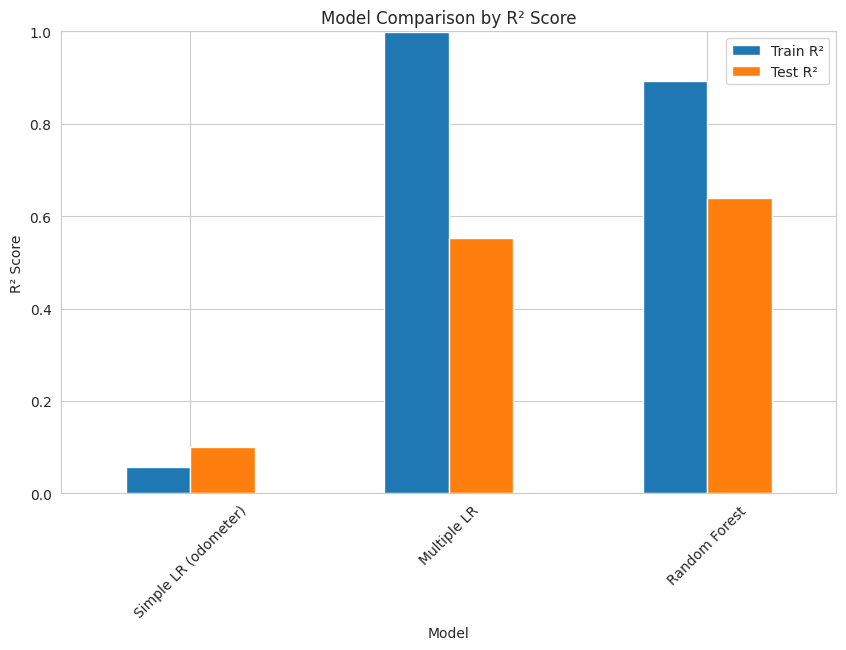

In [ ]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    try:
        # Handle missing values for LinearRegression or Pipeline models
        if 'LinearRegression' in str(type(model)) or 'Pipeline' in str(type(model)):
            X_train_clean = X_train.dropna()
            y_train_clean = y_train.loc[X_train_clean.index]
            X_test_clean = X_test.dropna()
            y_test_clean = y_test.loc[X_test_clean.index]
        else:
            X_train_clean = X_train
            y_train_clean = y_train
            X_test_clean = X_test
            y_test_clean = y_test

        # Training set performance
        y_train_pred = model.predict(X_train_clean)
        train_mae = mean_absolute_error(y_train_clean, y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train_clean, y_train_pred))
        train_r2 = r2_score(y_train_clean, y_train_pred)

        # Testing set performance
        y_test_pred = model.predict(X_test_clean)
        test_mae = mean_absolute_error(y_test_clean, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))
        test_r2 = r2_score(y_test_clean, y_test_pred)

        return pd.DataFrame({
            'Model': [name],
            'Train MAE': [train_mae],
            'Test MAE': [test_mae],
            'Train RMSE': [train_rmse],
            'Test RMSE': [test_rmse],
            'Train R²': [train_r2],
            'Test R²': [test_r2],
            'Samples Used': [f"{len(X_train_clean)}/{len(X_train)} train, {len(X_test_clean)}/{len(X_test)} test"]
        })

    except Exception as e:
        print(f"Error evaluating {name}: {str(e)}")
        return pd.DataFrame({
            'Model': [name],
            'Train MAE': [np.nan],
            'Test MAE': [np.nan],
            'Train RMSE': [np.nan],
            'Test RMSE': [np.nan],
            'Train R²': [np.nan],
            'Test R²': [np.nan],
            'Samples Used': ["Error"]
        })

# Prepare odometer-only datasets for Simple Linear Regression
X_train_odo = X_train[['odometer']].copy()
X_test_odo = X_test[['odometer']].copy()

# List of models to evaluate
models = [
    ('Simple LR (odometer)', simple_lr, X_train_odo, X_test_odo),
    ('Multiple LR', linear_pipeline, X_train, X_test),
    ('Random Forest', rf_pipeline, X_train, X_test)
]

# Evaluate all models and gather results
results = []
for name, model, X_tr, X_te in models:
    results.append(evaluate_model(name, model, X_tr, X_te, y_train, y_test))
results_df = pd.concat(results).reset_index(drop=True)
display(results_df)

# Visualize R² scores for comparison
plt.figure(figsize=(12, 6))
results_df.set_index('Model')[['Train R²', 'Test R²']].plot(kind='bar')
plt.title('Model Comparison by R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

8. Making Predictions on New Data

In [ ]:
# Creating sample new data with all expected columns
new_car = pd.DataFrame({
    'year': [2018],
    'manufacturer': ['toyota'],
    'model': ['camry'],
    'condition': ['good'],
    'cylinders': ['4 cylinders'],
    'fuel': ['gas'],
    'odometer': [45.6],
    'title_status': ['clean'],
    'transmission': ['automatic'],
    'drive': ['fwd'],
    'size': ['mid-size'],
    'type': ['sedan'],
    'paint_color': ['white'],
    'state': ['ca'],
    'posting_year': [2023],
    'age': [5],
    'long': [0.0],  # Default longitude
    'lat': [0.0],   # Default latitude
    'region': ['unknown'],  # Default region
    'VIN': ['unknown']     # Default VIN
})

# Ensure new data has the same columns as training data
new_car = new_car[X_train.columns]

try:
    # Predict price using Random Forest pipeline
    predicted_price = rf_pipeline.predict(new_car)
    print(f"Predicted vehicle price: ${predicted_price[0]:,.2f}")

    if 'residuals' not in globals():
        y_test_pred = rf_pipeline.predict(X_test)
        residuals = y_test - y_test_pred

    std_dev = residuals.std()
    print(f"Approximate 95% confidence interval: "
          f"${max(0, predicted_price[0] - 1.96*std_dev):,.2f} - "
          f"${predicted_price[0] + 1.96*std_dev:,.2f}")

    try:
        # Display top 5 feature importances if available
        if hasattr(rf_pipeline.named_steps['randomforestregressor'], 'feature_importances_'):
            importances = rf_pipeline.named_steps['randomforestregressor'].feature_importances_
            feature_names = (list(numerical_features) +
                           list(rf_pipeline.named_steps['columntransformer']
                              .named_transformers_['cat']
                              .named_steps['onehotencoder']
                              .get_feature_names_out(categorical_features)))

            importance_series = pd.Series(importances, index=feature_names)
            print("\nTop features affecting this prediction:")
            display(importance_series.sort_values(ascending=False).head(5))
    except Exception as e:
        print(f"\nCould not display feature importance: {str(e)}")

except Exception as e:
    print(f"Prediction failed: {str(e)}")
    print("Please ensure all required columns are present and properly formatted.")
    print(f"Required columns: {list(X_train.columns)}")

Predicted vehicle price: $18,541.38
Approximate 95% confidence interval: $5,577.32 - $31,505.43

Top features affecting this prediction:


,0
year,0.221143
odometer,0.216461
age,0.180743
drive_fwd,0.090373
lat,0.042037


9. Model Limitations and Business Considerations

In [ ]:
print("""
Model Limitations:
1. May miss regional price variations and seasonal trends.
2. Depends on data quality; missing or subjective inputs can skew results.

Business Considerations:
1. Retrain regularly with updated data.
2. Use predictions alongside expert judgment.
""")


Model Limitations:
1. May miss regional price variations and seasonal trends.
2. Depends on data quality; missing or subjective inputs can skew results.

Business Considerations:
1. Retrain regularly with updated data.
2. Use predictions alongside expert judgment.

